In [1]:
using Pkg
Pkg.activate("../Dashboard/env")
#Pkg.activate("/store/users/skukies/Projects/ECVP/src/")

  Activating project at `~/Desktop/Dashboard/env`


In [4]:
import Pkg
p = "Unfold"
Pkg.add(p)
Pkg.build(p)
Pkg.update(p)


   Resolving package versions...


  No Changes to `~/Desktop/Dashboard/env/Project.toml`
  No Changes to `~/Desktop/Dashboard/env/Manifest.toml`


    Building Conda ────→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`


    Building PyCall ───→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53b8b07b721b77144a0fbbbc2675222ebf40a02d/build.log`


    Building PyMNE ────→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/b3caa6ea95490974465487d54fc1e62a094bad8e/build.log`


    Building TimeZones → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/d634a3641062c040fc8a7e2a3ea17661cc159688/build.log`


    Updating registry at `~/.julia/registries/General.toml`


  No Changes to `~/Desktop/Dashboard/env/Project.toml`
  No Changes to `~/Desktop/Dashboard/env/Manifest.toml`


In [2]:
p = "Effects"
Pkg.rm(p)

    Updating `~/Desktop/Dashboard/env/Project.toml`
  [8f03c58b] - Effects v0.1.7
  No Changes to `~/Desktop/Dashboard/env/Manifest.toml`


In [26]:
Pkg.status()

Status `~/Desktop/Dashboard/env/Project.toml`
  [cbdf2221] AlgebraOfGraphics v0.6.11
  [13f3f980] CairoMakie v0.8.13
  [34da2185] Compat v4.3.0
  [8f03c58b] Effects v0.1.7
⌅ [6c5003b2] PyMNE v0.1.2
  [1277b4bf] ShiftedArrays v2.0.0
  [181c99d8] Unfold v0.3.11
  [69a5ce3b] UnfoldMakie v0.1.4
Info Packages marked with ⌅ have new versions available but cannot be upgraded. To see why use `status --outdated`


In [3]:
Pkg.add(name="Effects", version="0.1.5")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


    Updating `~/Desktop/Dashboard/env/Project.toml`
⌃ [8f03c58b] + Effects v0.1.5
    Updating `~/Desktop/Dashboard/env/Manifest.toml`


  [861a8166] - Combinatorics v1.0.2
⌃ [8f03c58b] ↓ Effects v0.1.7 ⇒ v0.1.5
        Info Packages marked with ⌃ have new versions available


Precompiling project...


  ✓ Effects


  ✓ Unfold


  ✓ UnfoldMakie
  3 dependencies successfully precompiled in 85 seconds. 244 already precompiled.


In [5]:
begin
	using PyMNE
	using Unfold
	using UnfoldMakie
	using AlgebraOfGraphics
	using CairoMakie
	using DataFrames
	using DataFramesMeta
	using CSV
	using ShiftedArrays
	using StatsModels
	using StatsBase
	using Markdown
	using InteractiveUtils
	using Compat
	using Effects
end

In [7]:
begin
	sub = 45
	path_subject = "/store/data/WLFO/derivatives/preproc_agert/sub-$(sub)/eeg/"
	raw = PyMNE.io.read_raw_eeglab(path_subject*"sub-$(sub)_task-WLFO_eeg.set")
end


PyObject <RawEEGLAB | sub-45_task-WLFO_eeg.set, 128 x 1484194 (2898.8 s), ~1.42 GB, data loaded>

In [8]:
sfreq = raw.info["sfreq"];

In [9]:
begin
	events = CSV.read(path_subject*"sub-$(sub)_task-WLFO_events.tsv",DataFrame, 	delim="\t")
	# add latency (event onsets in samples)
	events[!,:latency] .= events.onset .* sfreq;
end

9279-element Vector{Float64}:
     1.0
 22152.000064
 53332.500064
 53553.0
 53711.500064
 53812.000064
 53842.500064
 53916.500064
 53945.000064
 53992.000064
     ⋮
     1.472220000064e6
     1.472312000064e6
     1.472438499904e6
     1.472674500064e6
     1.472689000064e6
     1.472861000064e6
     1.472875500064e6
     1.473112499776e6
     1.47312250016e6

In [9]:
events

,type,duration,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x
,String15,Float64,Float64,Float64,Float64,Float64
1,__,0.0,0.0,0.0,0.0,0.0
2,200,0.0,0.0,0.0,0.0,0.0
3,blink,0.0498047,NaN,NaN,NaN,NaN
4,stimulus,6.0,NaN,NaN,NaN,NaN
5,fixation,0.193359,7.34,2452.3,1325.3,1970.3
6,saccade,0.0566406,15.2,1445.3,999.3,2501.0
7,fixation,0.140625,15.2,1445.3,999.3,2501.0
8,saccade,0.0527344,15.13,2529.5,694.5,1442.3
9,fixation,0.0888672,15.13,2529.5,694.5,1442.3


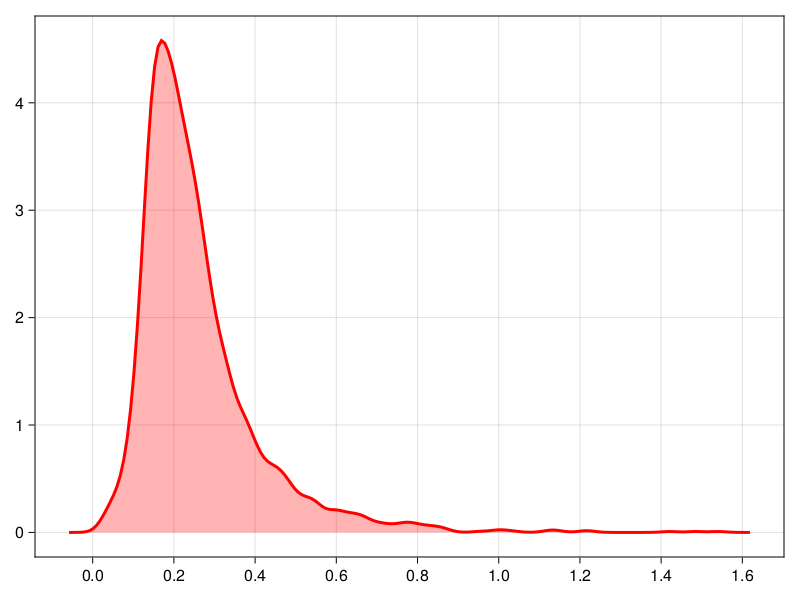

In [19]:
begin
	tmp = events
	tmp = tmp[tmp.type .== "fixation",:]
	f = Figure()
	axes = Axis(f[1, 1])
	density!(tmp.duration, color = (:red, 0.3),
    strokecolor = :red, strokewidth = 3)
	axes.xticks = 0:0.2:1.6
	f
end


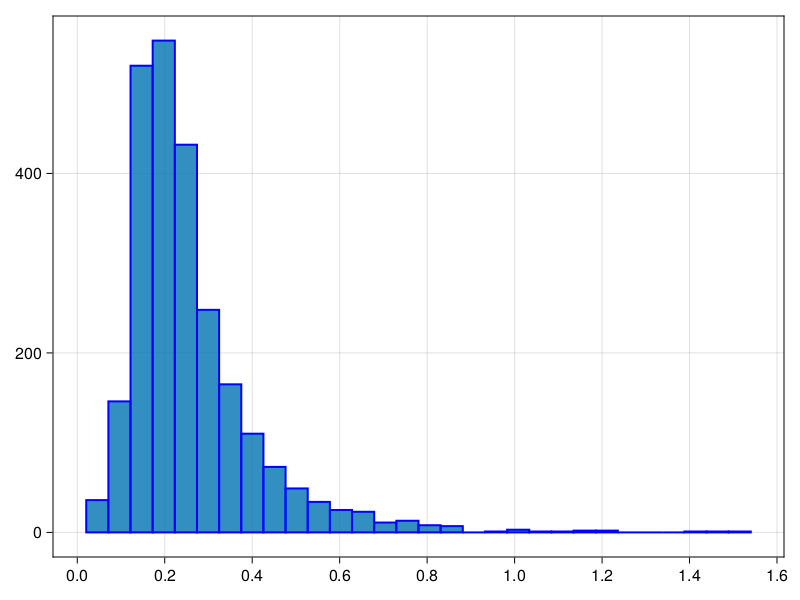

In [11]:
begin
	f2 = Figure()
	axes2 = Axis(f2[1, 1])
	hist!(tmp.duration, bins = 30, strokecolor = :blue, strokewidth = 2) #, color = (:red, 0.3),
    #strokecolor = :red, strokewidth = 3)
	axes2.xticks = 0:0.2:1.6
	f2
end

In [10]:
begin
	#channel = "Oz" #Index 31;
	# @Anmol Note: you probably want all channels here, just remove the picks=... part
	channel_list = ["Oz"]
	data = raw.get_data(picks=channel_list).*10^6;
end

1×1484194 Matrix{Float64}:
 -7.21554  1.26043  6.21151  -0.622163  …  63.0271  77.2092  102.203  64.8164

In [11]:
design = Dict(
"fixation"=>(
	@formula(0~1+spl(duration,5)),
	firbasis(τ=(-0.2,1),sfreq=sfreq,name="fixation")),
"stimulus"=>(
	@formula(0~1),
	firbasis(τ=(-0.2,1),sfreq=sfreq,name="stimulus")),
);

uf = fit(UnfoldModel,design,events,data,eventcolumn="type")

result = coeftable(uf)

,basisname,channel,coefname,estimate,group,stderror,time
,SubStrin…,Int64,String,Float64,Nothing,Nothing,Float64
1,fixation,1,(Intercept),0.538398,,,-0.199219
2,fixation,1,(Intercept),0.347385,,,-0.197266
3,fixation,1,(Intercept),0.152822,,,-0.195312
4,fixation,1,(Intercept),0.23222,,,-0.193359
5,fixation,1,(Intercept),0.491879,,,-0.191406
6,fixation,1,(Intercept),0.54841,,,-0.189453
7,fixation,1,(Intercept),0.458587,,,-0.1875
8,fixation,1,(Intercept),0.532856,,,-0.185547
9,fixation,1,(Intercept),0.252433,,,-0.183594


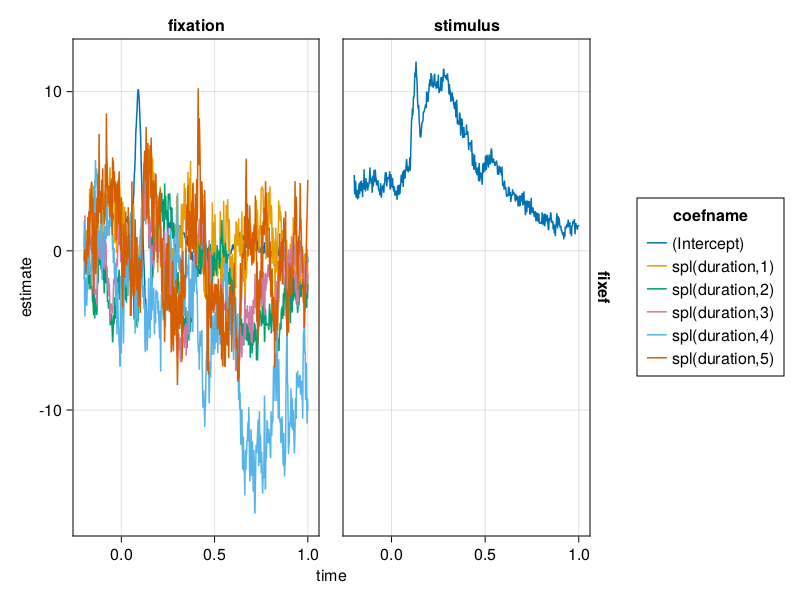

In [12]:
plot_results(result)

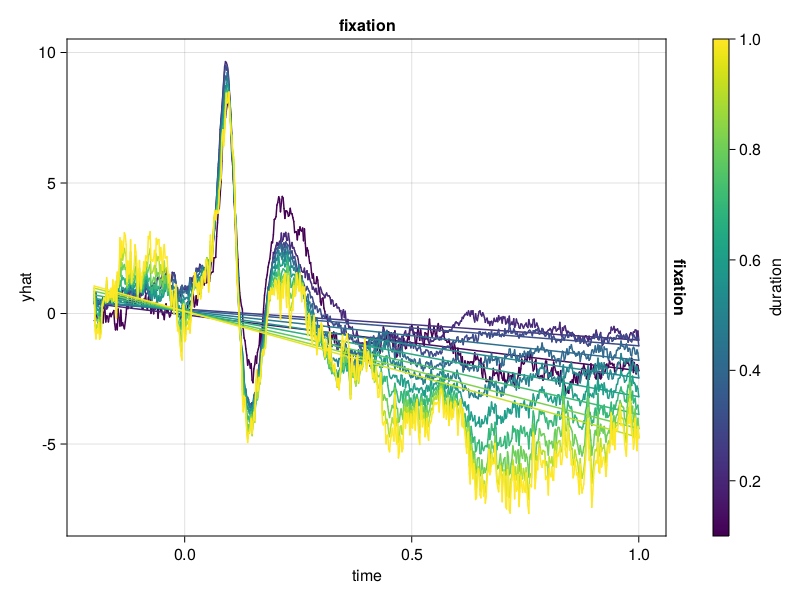

In [12]:
begin
	predict(uf,DataFrame("duration"=>0.1:0.2:1.0))
	eff = Unfold.effects(Dict(:duration=>0.1:0.1:1.0),uf)
	plot_results(@subset(eff,:basisname .=="fixation"),color=:duration)
end

In [26]:
eff

UndefVarError: UndefVarError: eff not defined

In [2]:
uf

UndefVarError: UndefVarError: uf not defined